# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Datasets/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y),1) # reshape(no of rows, no of columns)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
# we need for this because there is no explicit equation for the dependent variables like we had for the linear regressions
# therefore there are no coefficients compensating with lower values for the features with higher values
# SVM has an implicit equation for the dependent variable with respect to the features

from sklearn.preprocessing import StandardScaler
# not using the same object for both the dependent and independent variables (x & y)
# when we fir the object on the data it computes the mean and standard deviation (s.d.)
# since both the data ranges are different we cannot use the same object with same mean and s.d. values
sc_X = StandardScaler()
sc_y = StandardScaler()

# applying feature scaling to both dependent and independent variables
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [10]:
# We dont split into test and train cause we want to leverage maximum data to learn the correlation between the position and salary
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # kernel -> linear or non linear therefore works for all kinds of data
regressor.fit(X, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [11]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

# sc_X.transform([[6.5]] -> to make sure that the value provided is of the same scale as the matrix of features
# regressor.predict(sc_X.transform([[6.5]])) -> returns the predicted salary in the new scale 

array([170370.0204065])

## Visualising the SVR results

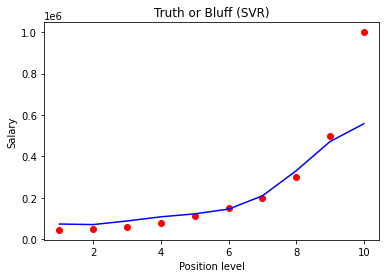

In [12]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

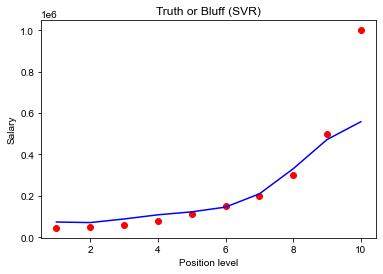

In [13]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
# sns.set_style("whitegrid")
# sns.set_style("dark")
# sns.set_style("ticks")
# sns.set_style("darkgrid", {'grid.color': '.5'})
# sns.set_style("dark")
# sns.set_context("poster")
sns.set()
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

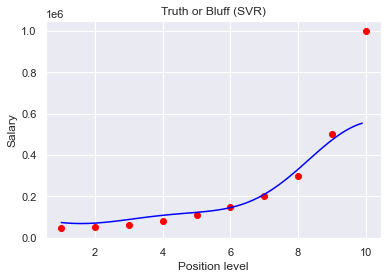

In [14]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()